# Question 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/DriverTraining-ForInClassLearning-2024.csv')
df
#print(df.to_string())

,class_date,city,state,zip_code,dob,gender
0,8/17/24,Richburg,South Carolina,29729,11/30/07,Male
1,8/10/24,Bluffton,South Carolina,29910-7957,10/16/07,Male
2,8/14/24,Hampton,South Carolina,29924,7/3/08,Female
3,8/9/24,Columbia,South Carolina,29210,10/10/06,Female
4,8/17/24,Irmo,South Carolina,29063,12/23/06,Female
...,...,...,...,...,...,...
16895,2/25/23,Chesnee,South Carolina,29323,11/16/05,Female
16896,2/4/23,Greenville,South Carolina,29607,5/22/07,Male
16897,2/4/23,Greenwood,South Carolina,29649,7/15/06,Female
16898,2/8/23,Boiling Springs,South Carolina,29316,2/17/06,Male


# a)

## 1.

In [8]:
print("Percent of data missing:")
100*(df.isnull().sum())/len(df)

Percent of data missing:


class_date    0.000000
city          0.000000
state         0.035503
zip_code      0.035503
dob           0.786982
gender        1.337278
dtype: float64

## 2.

Most of the issues are with missing data, but some area codes are extended, and some cities have different capitalization or punctuation.
To solve the inconsistencies with the cities we can make all cities lower case and remove punctuation.
For extended zip codes we can trim anything coming after a dash.
For missing values, the row can be removed if we are looking at that value specifically.

One minor issue is that the dates have two digit years which doesnt really play well with the library I'm using so I fixed that below.

My data cleaning strategy will mostly involve ignoring bad data.

In [3]:
from datetime import datetime
# 4 digit years
def formatDate(date):
    if (not isinstance(date, str)):
        return
    date_split = date.split('/')
    # Y2K 0_0
    prefix = '20'
    # Should check current year instead of hard coding 24
    if (int(date_split[2]) > 24):
        prefix = '19'
    return date[:len(date) - 2] + prefix + date[len(date) - 2:]

# Applying formatting to all rows
for _, row in df.iterrows():
    row['class_date'] = formatDate(row['class_date'])        
    row['dob'] = formatDate(row['dob']) 
df

,class_date,city,state,zip_code,dob,gender
0,8/17/2024,Richburg,South Carolina,29729,11/30/2007,Male
1,8/10/2024,Bluffton,South Carolina,29910-7957,10/16/2007,Male
2,8/14/2024,Hampton,South Carolina,29924,7/3/2008,Female
3,8/9/2024,Columbia,South Carolina,29210,10/10/2006,Female
4,8/17/2024,Irmo,South Carolina,29063,12/23/2006,Female
...,...,...,...,...,...,...
16895,2/25/2023,Chesnee,South Carolina,29323,11/16/2005,Female
16896,2/4/2023,Greenville,South Carolina,29607,5/22/2007,Male
16897,2/4/2023,Greenwood,South Carolina,29649,7/15/2006,Female
16898,2/8/2023,Boiling Springs,South Carolina,29316,2/17/2006,Male


# b)

## 1.

In [4]:
from dateutil.parser import parse

# Ignore all null genders
mfDf = df[~df['gender'].isnull()]
mPercent = 100*len(mfDf[mfDf['gender'] == 'Male'])/len(mfDf)
fPercent = 100*len(mfDf[mfDf['gender'] == 'Female'])/len(mfDf)
print('All Data:')
print('Percent male:   ', mPercent)
print('Percent female: ', fPercent)
# Getting rid of pandas warning
pd.options.mode.chained_assignment = None
mfDf["class_date"] = mfDf["class_date"].apply(lambda x: parse(x))
# Group by month
g = mfDf.groupby(pd.Grouper(key='class_date', freq='ME'))
dfs = [group for _, group in g]
# Don't feel like doing this the right way
month = 1
dfsByMonth = [0] * 12
for frame in dfs:
    if (month == 12):
        month = 0
    # dfsByMonth hasn't seen this month yet
    if (isinstance(dfsByMonth[month], int)):
        dfsByMonth[month] = frame
    else:
        dfsByMonth[month] = pd.concat([dfsByMonth[month], frame])
    month += 1

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
for idx, monthDf in enumerate(dfsByMonth):
    mPerc = 100*len(monthDf[monthDf['gender'] == 'Male'])/len(monthDf)
    fPerc = 100*len(monthDf[monthDf['gender'] == 'Female'])/len(monthDf)
    print('')
    print(months[idx], ':')
    print('Percent male:   ', mPerc)
    print('Percent female: ', fPerc)

All Data:
Percent male:    50.875614729519015
Percent female:  49.124385270480985

Jan :
Percent male:    49.741602067183464
Percent female:  50.258397932816536

Feb :
Percent male:    52.22222222222222
Percent female:  47.77777777777778

Mar :
Percent male:    51.00603621730382
Percent female:  48.99396378269618

Apr :
Percent male:    51.68539325842696
Percent female:  48.31460674157304

May :
Percent male:    50.12165450121655
Percent female:  49.87834549878345

Jun :
Percent male:    47.79361846571623
Percent female:  52.20638153428377

Jul :
Percent male:    49.1441908713693
Percent female:  50.8558091286307

Aug :
Percent male:    52.22127296027339
Percent female:  47.77872703972661

Sept :
Percent male:    51.61290322580645
Percent female:  48.38709677419355

Oct :
Percent male:    57.05765407554672
Percent female:  42.94234592445328

Nov :
Percent male:    48.729792147806
Percent female:  51.270207852194

Dec :
Percent male:    54.1371158392435
Percent female:  45.8628841607565

I don't see an overall pattern, but there seem to be much more males in Oct and Dec

## 2.

In [5]:
# Ignore all null DOB
mfDf = mfDf[~mfDf['dob'].isnull()]
mfDf["dob"] = mfDf["dob"].apply(lambda x: parse(x))
mfDf["age-days"] = mfDf["class_date"] - mfDf["dob"]
totalAvg = mfDf["age-days"].mean()
genderedMeans = mfDf.groupby('gender')["age-days"].mean()
print("Total   ", totalAvg)
print(genderedMeans)

Total    5957 days 11:27:20.739625344
gender
Female   5953 days 18:33:21.176470592
Male     5961 days 01:22:32.931422464
Name: age-days, dtype: timedelta64[ns]


One major assumption I made is that missing dob isn't due to the participant being younger or older than the average. I'm assuming the missing DOBs are uniformly random. I also chose to use days rather than years based on the assumption that all of the participants would be around 16 years old and years wouldn't show the difference.

## 3.

<Axes: xlabel='city', ylabel='Percent of total'>

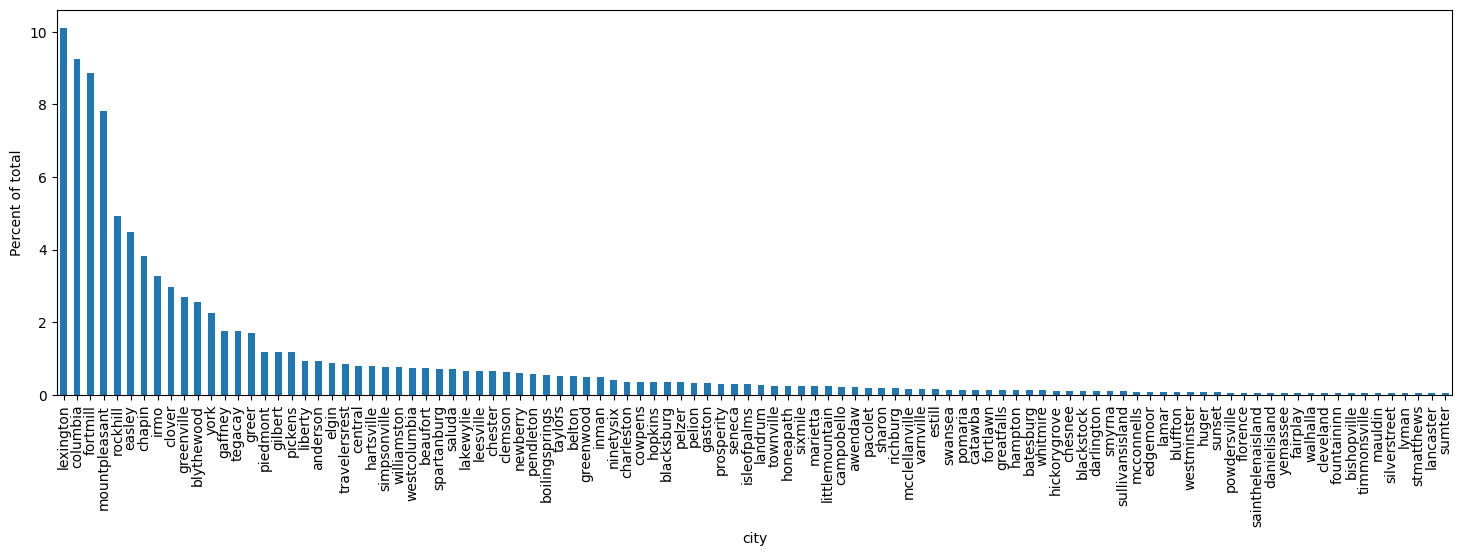

In [6]:
# Drop all rows without city data (Decided to just make them 'not given')
# cityDf = df[df['city'].notna()]
def formatCity(city):
    newCity = city.lower()
    newCity = ''.join(filter(str.isalnum, newCity))
    # Mount Pleasant has a very high amount of misspelling
    mtPleasant = {'mtpleasent', 'mtpleasant', 'mountpleasent'}
    if (newCity in mtPleasant):
        newCity = "mountpleasant"
    return newCity

# Didnt account for different states, but most of this is from SC
for _, row in df.iterrows():
    if (not isinstance(row['city'], str)):
        row['city'] = 'not given'
    else:
        row['city'] = formatCity(row['city'])

# A bunch of random spelling so I'm just dropping anything under 0.04%
# This removes places like John's Island, but since the majority are missplelligns im okay with it
counts = df['city'].value_counts(normalize=True).mul(100)
idx = 0
for _, val in counts.items():
    if (val <= 0.04):
        break
    idx += 1
counts = counts.iloc[:idx]
counts.plot(kind = 'bar', ylabel='Percent of total', figsize=(18,5))
# Idealy I would plug in the city names to some fuzzy search algorithm to match them with a list of cities and towns